In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('ticks')
palette = sns.color_palette("RdBu_r", n_colors=25)

from depynd.information import mutual_information, mimat, cmimat

In [2]:
cov = [[1, 0.5], [0.5, 1]]
x, y = tuple(np.random.multivariate_normal(np.zeros(2), cov, 2000).T)
mi_true = -0.5 * np.log(1 - 0.5 ** 2)
mi_pred_1 = mutual_information(x, y, mi_estimator='knn')
mi_pred_2 = mutual_information(x, y, mi_estimator='dr')
mi_true, mi_pred_1, mi_pred_2

(0.14384103622589045, 0.14960441691860726, 0.1634485030129938)

In [3]:
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data, columns=list(iris.feature_names))
df['target'] = iris.target
X = df.values

In [4]:
mis_knn = mimat(X, mi_estimator='knn')
cmis_knn = cmimat(X, mi_estimator='knn')

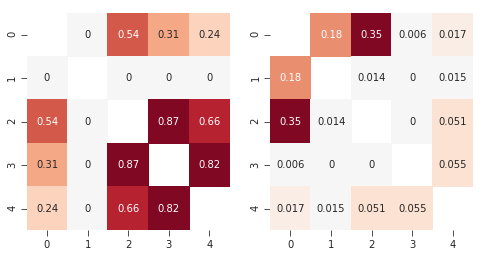

In [5]:
f, axes = plt.subplots(1, 2, figsize=[8, 4])
sns.heatmap(mis_knn, annot=True, center=0, cmap=palette, cbar=False, ax=axes[0])
sns.heatmap(cmis_knn, annot=True, center=0, cmap=palette, cbar=False, ax=axes[1])

In [6]:
boston = sklearn.datasets.load_boston()
df = pd.DataFrame(boston.data, columns=list(boston.feature_names))
df['target'] = boston.target
X = df.values

In [7]:
mis_knn = mimat(X, mi_estimator='knn')
cmis_knn = cmimat(X, mi_estimator='knn')

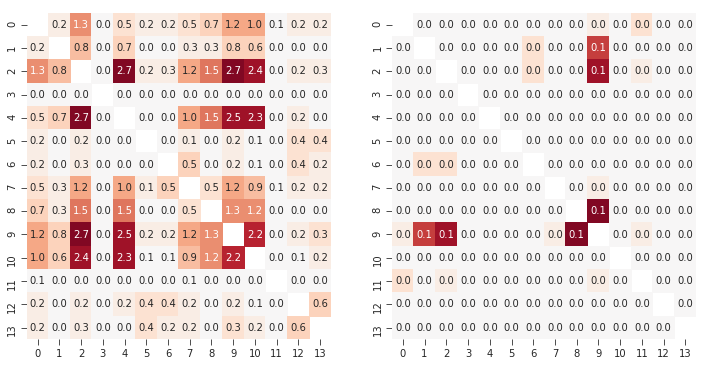

In [8]:
f, axes = plt.subplots(1, 2, figsize=[12, 6])
sns.heatmap(mis_knn, annot=True, center=0, cmap=palette, cbar=False, ax=axes[0], fmt='.1f')
sns.heatmap(cmis_knn, annot=True, center=0, cmap=palette, cbar=False, ax=axes[1], fmt='.1f')